In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
df=pd.read_csv('../input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')

In [3]:
test=pd.read_csv('../input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

# Preprocessing

In [4]:
print(df.shape)
print(test.shape)

(14731, 22)
(6599, 21)


In [5]:
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [6]:
# To check if target has any null values
print(df["Made_Purchase"].isnull().sum())

0


In [7]:
# Separate Target Variable
X = df.drop(["Made_Purchase"], axis=1)
y = df["Made_Purchase"]


In [8]:
test["Made_Purchase"] = ''
y_test = test["Made_Purchase"]
X_test = test.drop(["Made_Purchase"], axis=1)
# X_test = test

In [9]:
X_test.shape

(6599, 21)

In [10]:
y.value_counts() 

False    9065
True     5666
Name: Made_Purchase, dtype: int64

In [11]:
# To check the type of feature
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [12]:
#find which features are categorical
X.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month_SeasonalPurchase  14587 non-null  object
 1   CustomerType            14587 non-null  object
 2   Gender                  14586 non-null  object
 3   Cookies Setting         14587 non-null  object
 4   Education               14595 non-null  object
 5   Marital Status          14601 non-null  object
dtypes: object(6)
memory usage: 690.6+ KB


In [13]:
# Count null values
X.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
dtype: int64

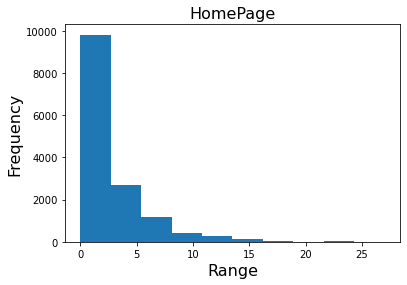

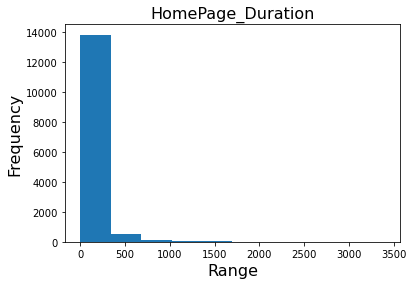

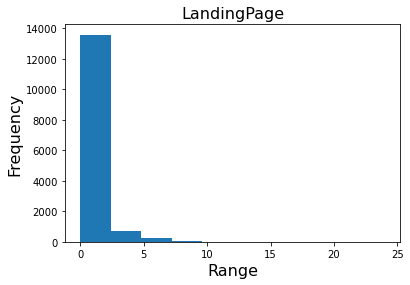

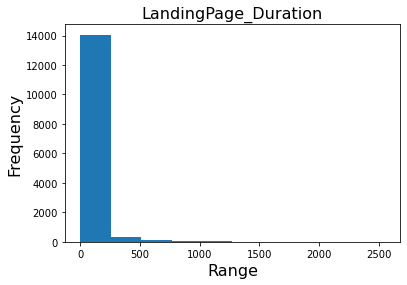

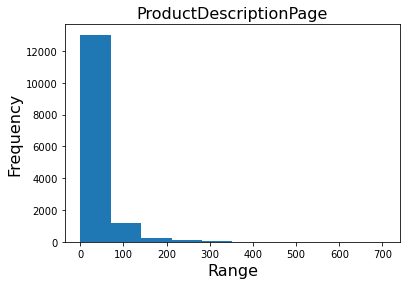

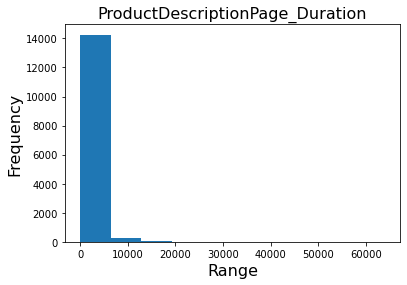

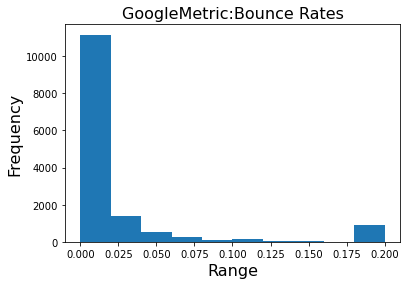

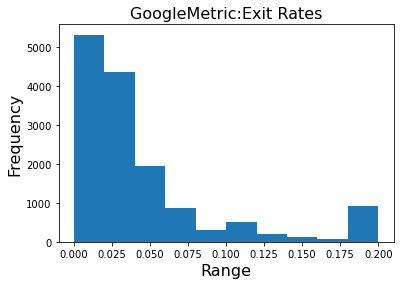

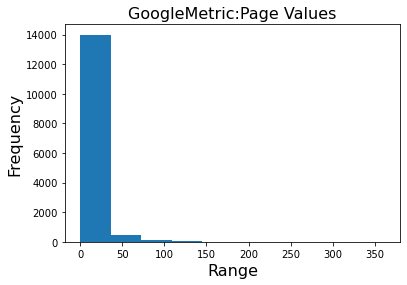

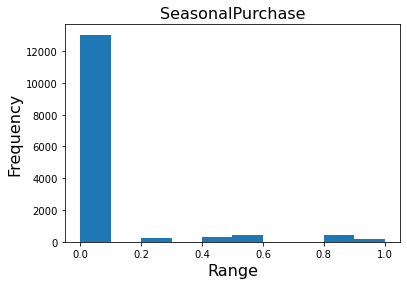

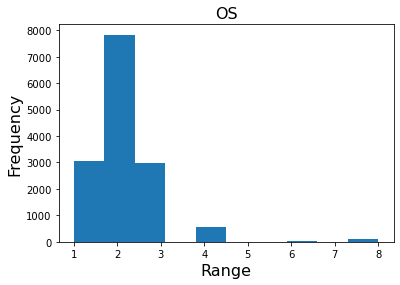

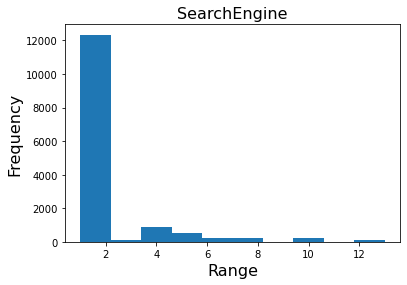

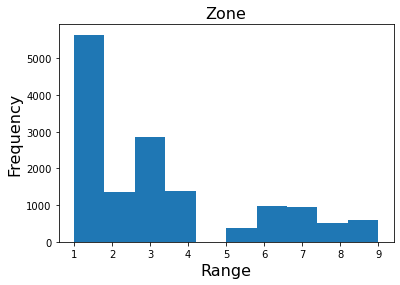

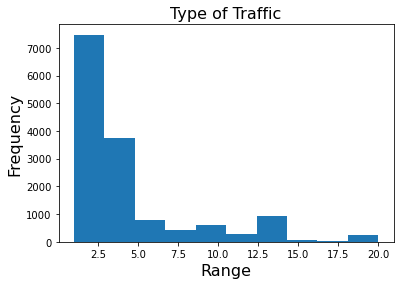

In [14]:
import matplotlib.pyplot as plt
cols = X.select_dtypes(include=['float64']).columns
for name in cols[0:len(cols)-1]:
  plt.hist(X[name].values)    # histogram plot
  plt.title(name,fontsize=16)
  plt.xlabel('Range',fontsize=16)
  plt.ylabel('Frequency',fontsize=16)
  plt.show()


<AxesSubplot:>

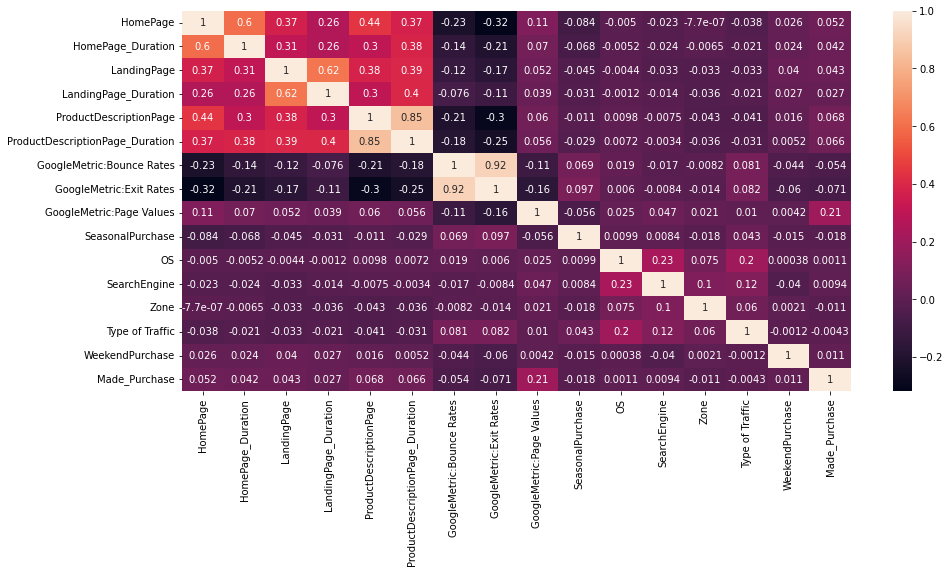

In [15]:
import seaborn as sns
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Made_Purchase', ylabel='GoogleMetric:Bounce Rates'>

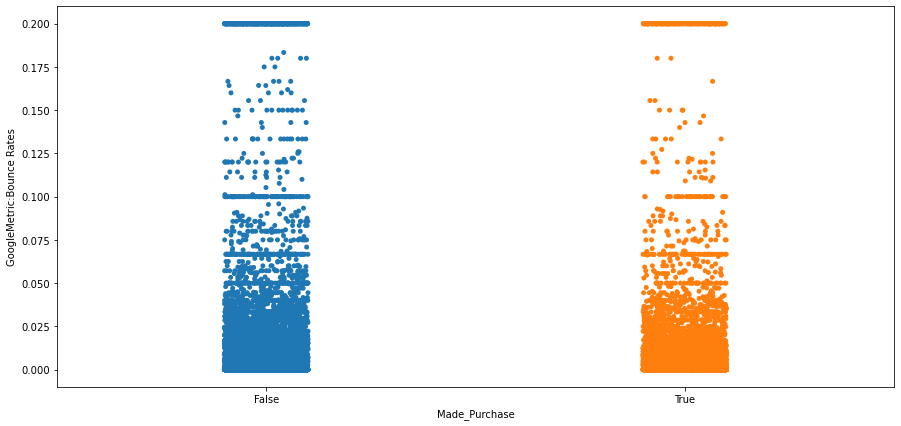

In [16]:
plt.figure(figsize=(15,7))
sns.stripplot(data=df, x="Made_Purchase", y="GoogleMetric:Bounce Rates")

# Whenever a user comes to any one web-page of the website and he/she does not go to any other page 
# and exits from the website from the same page, then this activity done by the user is called Bounce. 
# And the percentage of the total number of times the user visiting our website and bounce it

# Lower bounce rate is better for the website

<AxesSubplot:xlabel='Made_Purchase', ylabel='GoogleMetric:Exit Rates'>

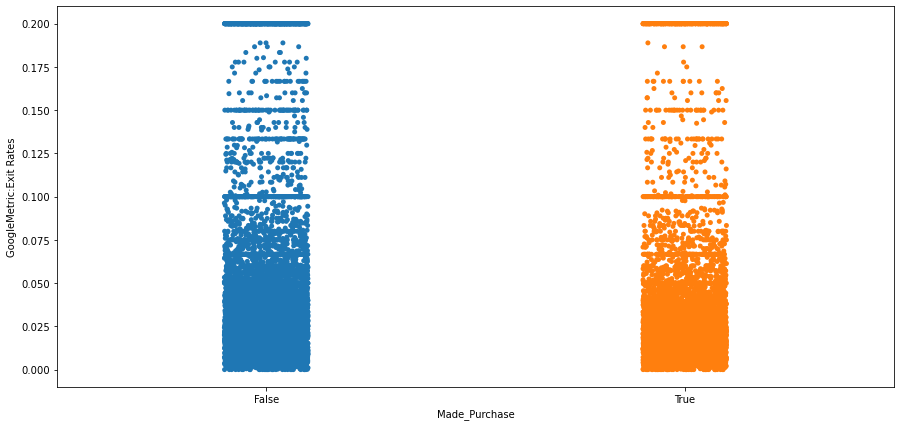

In [17]:
plt.figure(figsize=(15,7))
sns.stripplot(data=df, x="Made_Purchase", y="GoogleMetric:Exit Rates")

# The percentage of the total number of times the user to our website who do not exit from the 
# first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.

# Lower exit rate is better for the website 

<AxesSubplot:xlabel='Made_Purchase', ylabel='GoogleMetric:Page Values'>

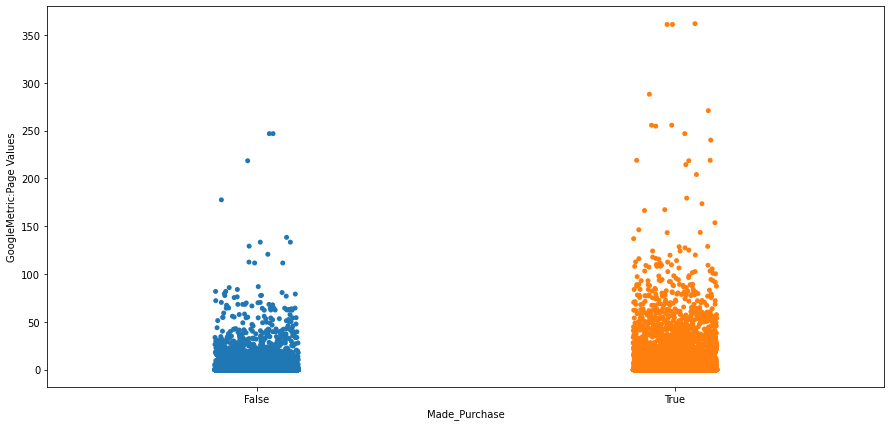

In [18]:
plt.figure(figsize=(15,7))
sns.stripplot(data=df, x="Made_Purchase", y="GoogleMetric:Page Values")


# Page Value is the average value for a page that a user visited before landing on the 
# goal page or completing an Ecommerce transaction.

In [19]:
print(X["Month_SeasonalPurchase"].unique())
print(X["CustomerType"].unique())
print(X["Gender"].unique())
print(X["Cookies Setting"].unique())
print(X["Education"].unique())
print(X["Marital Status"].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec' nan]
['Returning_Visitor' 'New_Visitor' 'Other' nan]
['Not Specified' 'Female' 'Male' nan]
['Deny' 'ALL' 'Required' nan]
['Not Specified' 'Others' 'Diploma' 'Graduate' nan]
['Other' 'Married' 'Single' nan]


In [20]:
X.replace('nan', np.nan)
X_test.replace('nan', np.nan)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.000000,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.000000,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.000000,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.000000,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,0.0,0.000000,0.0,0.0,7.0,208.000000,0.000000,0.028571,0.0,0.0,...,4.0,1.0,1.0,5.0,Returning_Visitor,Not Specified,Required,Graduate,Other,1.0
6595,0.0,0.000000,3.0,44.0,179.0,1738.472529,0.000027,0.025998,0.0,0.0,...,2.0,4.0,9.0,11.0,Returning_Visitor,Male,Required,Not Specified,Other,0.0
6596,5.0,99.166667,1.0,27.0,33.0,NaN,0.002778,0.009127,0.0,0.6,...,8.0,5.0,1.0,2.0,Returning_Visitor,Female,Required,Graduate,Married,0.0
6597,0.0,0.000000,0.0,0.0,3.0,9.000000,0.066667,0.133333,0.0,0.0,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Deny,Diploma,Other,1.0


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
months = ['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep','Dec']
customer = ['Returning_Visitor', 'New_Visitor', 'Other']
gender = ['Not Specified', 'Female', 'Male']
cookies = ['Deny', 'ALL', 'Required']
education = ['Not Specified', 'Others', 'Diploma', 'Graduate']
status = ['Other', 'Married', 'Single']

In [23]:
# Categorical Encoder

# cat_encoder=ColumnTransformer([('months',OrdinalEncoder(categories=[months]),[10]),
#                           ('customer',OrdinalEncoder(categories=[customer]),[15]),
#                           ('gender',OrdinalEncoder(categories=[gender]),[16]),
#                           ('cookies',OrdinalEncoder(categories=[cookies]),[17]),
#                           ('education',OrdinalEncoder(categories=[education]),[18]),
#                           ('status',OrdinalEncoder(categories=[status]),[19])
#                          ],remainder='passthrough')

In [24]:
# # Categorical Encoder

# cat_encoder=ColumnTransformer([
#                           ('months',OneHotEncoder(categories=[months]),[10]),
#                           ('customer',OneHotEncoder(categories=[customer]),[15]),
#                           ('gender',OneHotEncoder(categories=[gender]),[16]),
#                           ('cookies',OneHotEncoder(categories=[cookies]),[17]),
#                           ('education',OneHotEncoder(categories=[education]),[18]),
#                           ('status',OneHotEncoder(categories=[status]),[19]),
#                          ],remainder='passthrough')

# # this is giving marginally better score

In [25]:
# Categorical Encoder

cat_encoder=ColumnTransformer([
                          ('months',OrdinalEncoder(categories=[months]),[10]),
                          ('customer',OneHotEncoder(categories=[customer]),[15]),
                          ('gender',OrdinalEncoder(categories=[gender]),[16]),
                          ('cookies',OrdinalEncoder(categories=[cookies]),[17]),
                          ('education',OrdinalEncoder(categories=[education]),[18]),
                          ('status',OrdinalEncoder(categories=[status]),[19]),
                         ],remainder='passthrough')

In [26]:
#Removing irrelevant features 

# X= X.drop(["Cookies Setting"], axis=1)
# X_test = X_test.drop(["Cookies Setting"], axis=1)

# X= X.drop(["Education"], axis=1)
# X_test = X_test.drop(["Education"], axis=1)

# X= X.drop(["Marital Status"], axis=1)
# X_test = X_test.drop(["Marital Status"], axis=1)


# Categorical Encoder

# cat_encoder=ColumnTransformer([
#                           ('months',OrdinalEncoder(categories=[months]),[10]),
#                           ('customer',OneHotEncoder(categories=[customer]),[15]),
#                           ('gender',OrdinalEncoder(categories=[gender]),[16])
#                           ],remainder='passthrough')

In [27]:
# pipe=Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
#                 ('encode',cat_encoder),
#                ('scale', StandardScaler())
#                ])

## this is giving lesser score

In [28]:
pipe=Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                ('encode',cat_encoder)
               ])

In [29]:
X=pipe.fit_transform(X)

In [30]:
X

array([[0.0, 1.0, 0.0, ..., 9.0, 3.0, 0.0],
       [0.0, 1.0, 0.0, ..., 2.0, 4.0, 0.0],
       [0.0, 1.0, 0.0, ..., 1.0, 4.0, 1.0],
       ...,
       [6.0, 1.0, 0.0, ..., 4.0, 2.0, 0.0],
       [1.0, 1.0, 0.0, ..., 4.0, 1.0, 0.0],
       [1.0, 1.0, 0.0, ..., 3.0, 1.0, 0.0]], dtype=object)

In [31]:
# np.isnan(X).sum()

In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
X, y = sm.fit_resample(X,y)
y.value_counts() 

False    9065
True     9065
Name: Made_Purchase, dtype: int64

In [33]:
X_test = pipe.fit_transform(X_test)

In [34]:
X_test.shape

(6599, 23)

<AxesSubplot:>

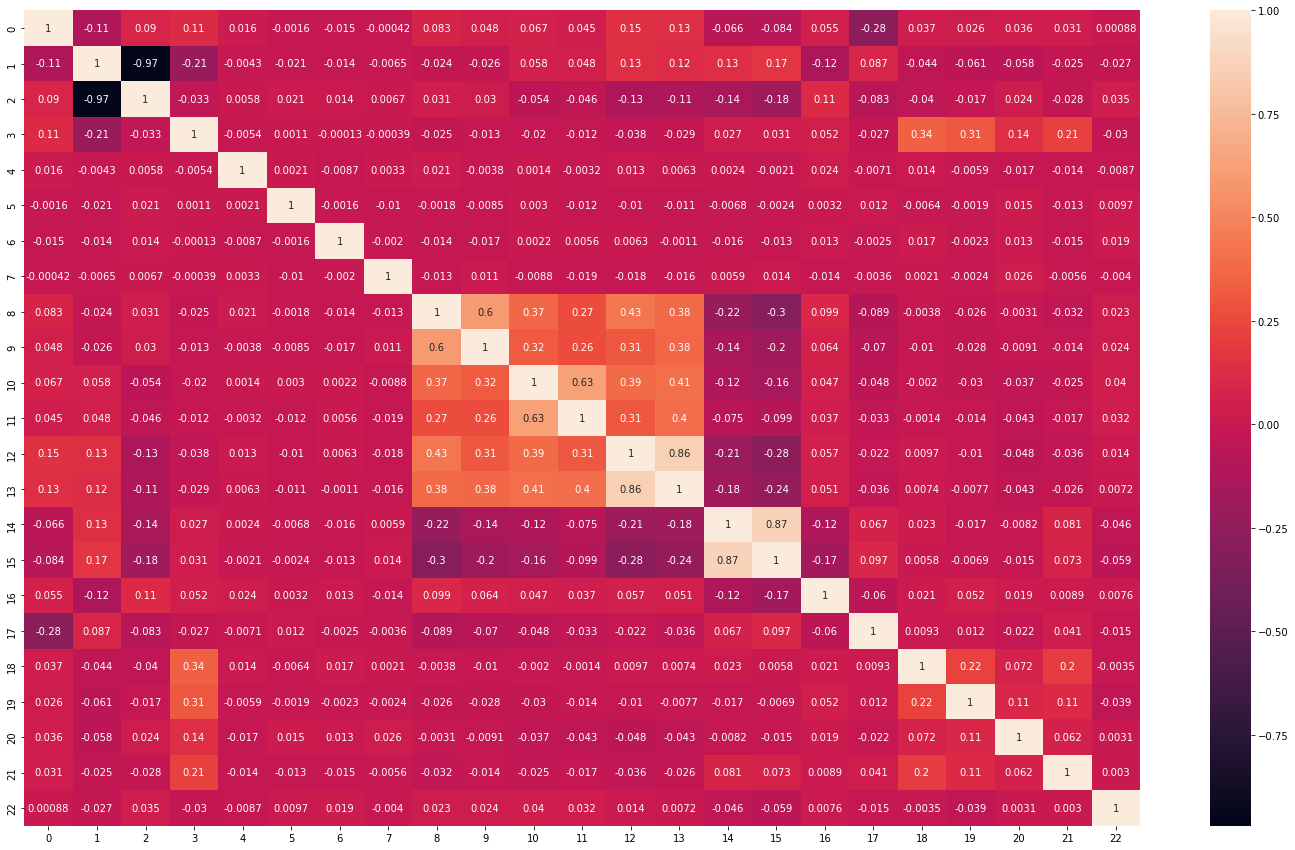

In [35]:
import seaborn as sns
plt.figure(figsize=(25,15))

sns.heatmap(pd.DataFrame(X).corr(), annot=True)

# Model Fitting

## Finding the Best Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

In [37]:
X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=0.20, random_state=1,stratify=y)

In [38]:
classifiers = [
    LogisticRegression(),
    RidgeClassifier(),
    KNeighborsClassifier(15),
    SVC(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    SGDClassifier(),
]

In [39]:
import warnings
warnings.filterwarnings('ignore')

max = 0
max_clf = ""
for clf in classifiers:
    clf.fit(X_train1, y_train1)
    y_pred1=clf.predict(X_test1)
    f1 = f1_score(y_test1, y_pred1,average='weighted')
    if f1 > max:
        max = f1
        max_clf = clf
    print(clf, f1)
    
print("\nBest Model: ", max_clf,"\nAccuraacy: ", max)

LogisticRegression() 0.5708674212182407
RidgeClassifier() 0.5738919678280872
KNeighborsClassifier(n_neighbors=15) 0.5484976397897502
SVC() 0.5510821129635256
DecisionTreeClassifier() 0.5576222209224966
ExtraTreesClassifier() 0.6095433254732759
RandomForestClassifier() 0.608699714120219
AdaBoostClassifier() 0.707099435682028
GaussianNB() 0.538216120250761
SGDClassifier() 0.5069383900029062

Best Model:  AdaBoostClassifier() 
Accuraacy:  0.707099435682028


In [40]:
max_clf.fit(X, y)
y_pred=max_clf.predict(X_test)

In [41]:
from sklearn.ensemble import AdaBoostClassifier


if str(max_clf) == "AdaBoostClassifier()":
  ada = AdaBoostClassifier(n_estimators=100)
  ada.fit(X_train1, y_train1)
  y_pred1 = ada.predict(X_test1)
  f1 = f1_score(y_test1, y_pred1,average='weighted')
  print("AdaBoost Model(n_estimtor = 100): ", f1)

  ada.fit(X, y)
  y_pred = ada.predict(X_test)

AdaBoost Model(n_estimtor = 100):  0.7127909563435979


## Random Forest

In [42]:
# from sklearn.ensemble import RandomForestClassifier

# reg= RandomForestClassifier(criterion='entropy', max_depth= 7, max_features='auto', n_estimators= 200)
# reg.fit(X,y)

# y_pred=reg.predict(X_test)

## Logistic Regression

In [43]:
# best without for loop
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(X, y)

# y_pred = lr.predict(X_test)

In [44]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()

# import warnings
# warnings.filterwarnings('ignore')

# param_grid = {
#     'penalty' : ['l1','l2'], 
#     'C'       : np.logspace(-3,3,7),
#     'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
# }


# grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1')
# grid_search.fit(X, y)

# y_pred = grid_search.predict(X_test)

In [45]:
# grid_search.best_params_

## Ridge Classifier

In [46]:
# from sklearn.linear_model import RidgeClassifierCV

# rdgclassifier = RidgeClassifierCV()
# rdgclassifier.fit(X, y)

# y_pred=rdgclassifier.predict(X_test)

In [47]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import RidgeClassifier
# ridge = RidgeClassifier()

# param_grid = {'alpha': [0.1, 1, 10, 100],
#               'fit_intercept': [True, False],
#               'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
#               'max_iter': [None, 100, 1000]}

# grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='f1')
# grid_search.fit(X, y)

# grid_search.best_params_

In [48]:
# ridge_best = RidgeClassifier(alpha=grid_search.best_params_['alpha'])
# ridge_best.fit(X, y)

In [49]:
# y_pred=ridge_best.predict(X_test)

In [50]:
# ridge_best.score(X_test, y_test)

In [51]:
# from sklearn.metrics import f1_score

# score = f1_score(y_test, y_pred)
# print(score)

# Submission

In [52]:
d={'Made_Purchase':y_pred}
out=pd.DataFrame(d)
out.to_csv('submission.csv',index_label='id')